In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID-19_CBC_Data.csv',
                parse_dates=['Admission_DATE ', 'Discharge_DATE or date of Death', 'Sample Collection Date '])
df.head()

,Admission_DATE,Discharge_DATE or date of Death,Outcome,Patient Age,Gender,Sample Collection Date,What kind of Treatment provided,Ventilated (Y/N),Red blood cell distribution width,Monocytes(%),White blood cell count,Platelet Count,Lymphocyte Count,Neutrophils Count
0,2020-08-10,2020-08-08,Not Recovered,51,Male,8/10/2020,"antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43
1,2020-07-24,2020-08-05,Not Recovered,65,Female,7/24/2020,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56
2,2020-07-22,2020-08-08,Recovered,32,Male,7/22/2020,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34
3,2020-07-19,2020-08-05,Recovered,36,Female,7/19/2020,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66
4,2020-07-18,2020-08-05,Recovered,46,Male,7/18/2020,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02


In [3]:
df.describe()

,Patient Age,Red blood cell distribution width,Monocytes(%),White blood cell count,Platelet Count,Lymphocyte Count,Neutrophils Count
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,47.262136,30.691262,3.939806,12.036505,216.367379,3.520971,8.176019
std,15.749859,22.193746,2.088171,10.258011,57.102773,2.909417,5.158653
min,17.000000,10.000000,2.000000,0.010000,17.400000,0.000000,0.010000
25%,35.000000,13.650000,3.000000,7.545000,184.000000,1.600000,5.340000
50%,46.000000,21.000000,3.000000,9.570000,213.400000,3.470000,7.590000
75%,60.000000,40.000000,4.950000,12.690000,241.500000,4.360000,8.535000
max,77.000000,100.000000,14.300000,85.000000,462.000000,16.500000,34.510000


In [4]:
df.dtypes

Admission_DATE                       datetime64[ns]
Discharge_DATE or date of Death      datetime64[ns]
Outcome                                      object
Patient Age                                   int64
Gender                                       object
Sample Collection Date                       object
What kind of Treatment provided              object
Ventilated (Y/N)                             object
Red blood cell distribution width           float64
Monocytes(%)                                float64
White blood cell count                      float64
Platelet Count                              float64
Lymphocyte Count                            float64
Neutrophils Count                           float64
dtype: object

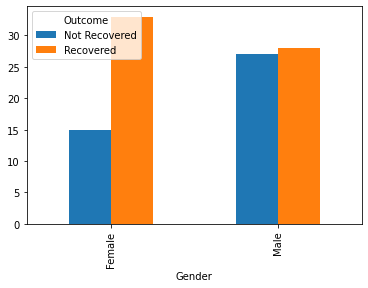

In [5]:
pivot = pd.pivot_table(df, values='Patient Age', index='Gender', columns='Outcome', aggfunc='count')
pivot.plot(kind='bar');

Proportionally, more females recovered than males.

In [6]:
# Getting rid of whitespace from column names
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns={'Outcome': 'Recovered'})

In [7]:
# Turning binary columns into binary data types
df['Recovered'] = df['Recovered'].replace(['Not Recovered', 'Recovered'], [0, 1]).astype('int8')
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0]).astype('int8')
# df['Sample_Collection_Date_'] = pd.to_datetime(df['Sample_Collection_Date_'], format='%m/%d/%Y')
df['Ventilated_(Y/N)'] = df['Ventilated_(Y/N)'].replace(['Yes', 'No'], [1, 0]).astype('int8')

In [8]:
# There are a couple date entries in a different format than the rest
df[~df['Sample_Collection_Date_'].str.match(r'^\d{1,2}/\d{1,2}/\d{4}$')]

,Admission_DATE_,Discharge_DATE_or_date_of_Death,Recovered,Patient_Age,Gender,Sample_Collection_Date_,What_kind_of_Treatment_provided_,Ventilated_(Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count
52,2020-06-17,2020-06-23,0,56,1,0617/2020,"Paracetamol, Antibiotics, O2",1,69.0,2.0,33.91,172.41,15.60,30.18
53,2020-06-17,2020-06-23,0,59,1,0617/2020,"Paracetamol, Antibiotics, O2",1,76.0,5.0,7.22,179.53,3.76,5.78


In [9]:
# Changing the anomalous date entries
df['Sample_Collection_Date_'] = df['Sample_Collection_Date_'].str.replace(r'^(\d{2})(\d{2})/(\d{4})$', r'\g<1>/\g<2>/\g<3>', regex=True)
df['Sample_Collection_Date_'] = pd.to_datetime(df['Sample_Collection_Date_'], format='%m/%d/%Y')

In [10]:
# There is no missing data
df.isnull().sum()

Admission_DATE_                      0
Discharge_DATE_or_date_of_Death      0
Recovered                            0
Patient_Age                          0
Gender                               0
Sample_Collection_Date_              0
What_kind_of_Treatment_provided_     0
Ventilated_(Y/N)                     0
Red_blood_cell_distribution_width    0
Monocytes(%)                         0
White_blood_cell_count               0
Platelet_Count                       0
Lymphocyte_Count                     0
Neutrophils_Count                    0
dtype: int64

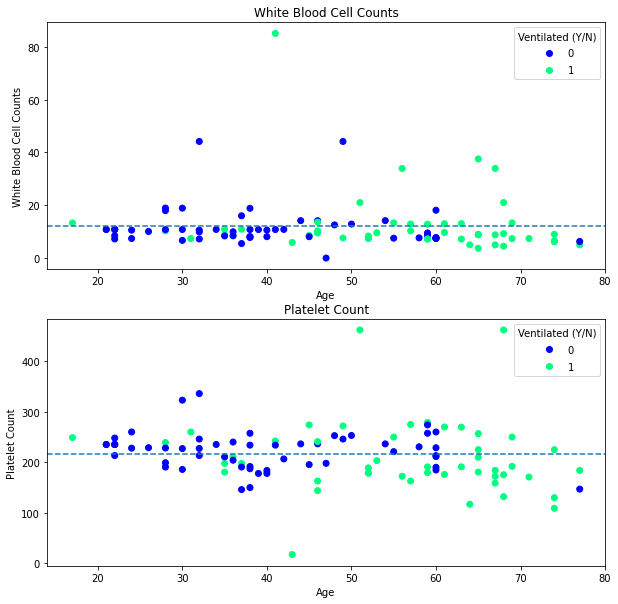

In [11]:
# Let's compare white blood cell and platelet counts for those who
# needed ventilation versus those who did notb

fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10))

scatter = ax0.scatter(x=df['Patient_Age'],
                     y=df['White_blood_cell_count'],
                     c=df['Ventilated_(Y/N)'],
                     cmap='winter')

ax0.set(title='White Blood Cell Counts',
       xlabel='Age',
       ylabel='White Blood Cell Counts')

ax0.legend(*scatter.legend_elements(), title='Ventilated (Y/N)')
ax0.axhline(y=df['White_blood_cell_count'].mean(), linestyle='--')

scatter1 = ax1.scatter(x=df['Patient_Age'],
                      y=df['Platelet_Count'],
                      c=df['Ventilated_(Y/N)'],
                      cmap='winter')

ax1.set(title='Platelet Count',
       xlabel='Age',
       ylabel='Platelet Count')

ax1.legend(*scatter.legend_elements(), title='Ventilated (Y/N)')
ax1.axhline(y=df['Platelet_Count'].mean(), linestyle='--');

Generally, it looks like platelet count was lower for those who needed ventilation. Also, older patients needed ventilation more than younger patients.

[Text(0.5, 1.0, 'Lymphocyte Count')]

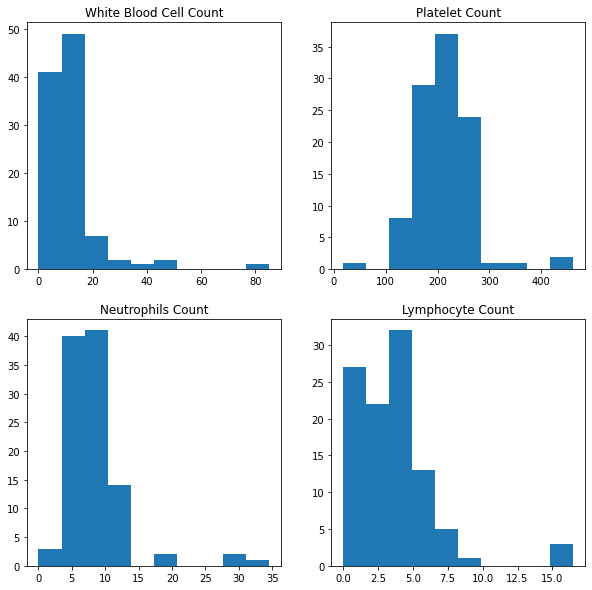

In [12]:
# Getting an overall picture of the distribution of counts

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                          ncols=2,
                                          figsize=(10, 10))

ax1.hist(df['White_blood_cell_count']);
ax1.set(title='White Blood Cell Count')

ax2.hist(df['Platelet_Count']);
ax2.set(title='Platelet Count')

ax3.hist(df['Neutrophils_Count']);
ax3.set(title='Neutrophils Count')

ax4.hist(df['Lymphocyte_Count']);
ax4.set(title='Lymphocyte Count')

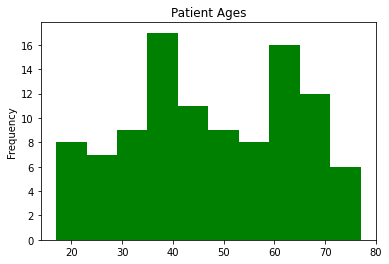

In [13]:
# Most patients are middle-aged or elderly
df['Patient_Age'].plot(kind='hist',
                      color='green',
                      bins=10,
                      title='Patient Ages');

In [14]:
# There is an anamolous time delta for length of stay
df['Length_of_Stay'] = df['Discharge_DATE_or_date_of_Death'] - df['Admission_DATE_']
df['Length_of_Stay'].head()

0   -2 days
1   12 days
2   17 days
3   17 days
4   18 days
Name: Length_of_Stay, dtype: timedelta64[ns]

In [15]:
df_filtered = df[df['Length_of_Stay'] >= pd.to_timedelta(0)].drop(['Admission_DATE_', 'Discharge_DATE_or_date_of_Death'], axis=1)
df_filtered

,Recovered,Patient_Age,Gender,Sample_Collection_Date_,What_kind_of_Treatment_provided_,Ventilated_(Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Length_of_Stay
1,0,65,0,2020-07-24,"Paracetamol, Antibiotics, O2",1,40.0,3.0,8.79,180.66,4.39,7.56,12 days
2,1,32,1,2020-07-22,"Antibiotics, O2",0,11.7,5.3,9.90,336.00,3.47,5.34,17 days
3,1,36,0,2020-07-19,"Antibiotics, O2",0,13.0,5.0,9.95,240.10,0.80,8.66,17 days
4,1,46,1,2020-07-18,"Paracetamol, Antibiotics, O2",0,31.0,3.0,14.15,236.58,7.93,13.02,18 days
5,0,17,1,2020-07-17,"antibiotics, O2",1,38.0,6.7,13.30,249.00,4.12,8.15,21 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,42,0,2020-05-07,"Antibiotics, O2",0,26.0,3.0,10.85,206.67,5.64,9.77,13 days
99,1,30,0,2020-05-07,"Antibiotics, O2",0,12.0,3.0,10.82,227.22,4.33,8.44,14 days
100,1,39,0,2020-05-06,"Antibiotics, O2",0,12.9,2.5,10.80,178.00,1.03,9.44,14 days
101,1,35,0,2020-05-06,"Antibiotics, O2",0,16.0,4.0,8.39,210.76,1.68,6.71,14 days


There are some more anomalous data in the treatment column, with inconsistent capitalization and numbers for oxygen. I'll use a regex to format it properly.

In [16]:

df_filtered['What_kind_of_Treatment_provided_'] = df_filtered['What_kind_of_Treatment_provided_'].str.replace(r'O\d', 'O2',
                                                                                                         regex=True)
df_filtered['What_kind_of_Treatment_provided_'] = df_filtered['What_kind_of_Treatment_provided_'].str.replace(r'a(?=ntibiotics)','A',
                                                                                                         regex=True)

df_filtered['What_kind_of_Treatment_provided_'].value_counts()

Antibiotics, O2                  41
Antibiotics,  O2                 30
Paracetamol, Antibiotics,  O2    18
Antibiotics                      10
Antibiotic,  O2                   2
Name: What_kind_of_Treatment_provided_, dtype: int64

In [17]:
df_filtered.T

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
Recovered,0,1,1,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Patient_Age,65,32,36,46,17,30,55,67,28,46,...,36,32,40,40,60,42,30,39,35,60
Gender,0,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample_Collection_Date_,2020-07-24 00:00:00,2020-07-22 00:00:00,2020-07-19 00:00:00,2020-07-18 00:00:00,2020-07-17 00:00:00,2020-07-16 00:00:00,2020-07-16 00:00:00,2020-07-15 00:00:00,2020-07-15 00:00:00,2020-07-14 00:00:00,...,2020-05-09 00:00:00,2020-05-08 00:00:00,2020-07-05 00:00:00,2020-05-07 00:00:00,2020-05-01 00:00:00,2020-05-07 00:00:00,2020-05-07 00:00:00,2020-05-06 00:00:00,2020-05-06 00:00:00,2020-05-06 00:00:00
What_kind_of_Treatment_provided_,"Paracetamol, Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Paracetamol, Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Paracetamol, Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2",...,"Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2","Antibiotics, O2"
Ventilated_(Y/N),1,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Red_blood_cell_distribution_width,40.0,11.7,13.0,31.0,38.0,11.7,57.0,16.7,49.0,12.6,...,28.0,19.0,13.5,28.0,30.0,26.0,12.0,12.9,16.0,14.5
Monocytes(%),3.0,5.3,5.0,3.0,6.7,4.9,3.0,14.3,11.8,4.0,...,3.0,5.0,4.1,3.0,2.0,3.0,3.0,2.5,4.0,4.0
White_blood_cell_count,8.79,9.9,9.95,14.15,13.3,6.7,13.33,5.0,10.32,9.5,...,8.48,7.23,8.1,10.6,18.11,10.85,10.82,10.8,8.39,7.72
Platelet_Count,180.66,336.0,240.1,236.58,249.0,323.0,250.01,184.0,239.25,241.0,...,204.14,213.4,178.0,183.82,184.73,206.67,227.22,178.0,210.76,228.82


In [18]:
# Converting the stay length to an integer
df_filtered['Length_of_Stay'] = df_filtered['Length_of_Stay'].dt.days

I'm dropping the sample collection date column because it won't be very useful for the machine learning model.

In [19]:
df_filtered = df_filtered.drop('Sample_Collection_Date_', axis=1)

In [20]:
# Making column names more concise
df_filtered = df_filtered.rename(columns={'What_kind_of_Treatment_provided_': 'Treatment',
                                         'Ventilated_(Y/N)': 'Ventilated',
                                         'Patient_Age': 'Age'})
df_filtered.head()

,Recovered,Age,Gender,Treatment,Ventilated,Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Length_of_Stay
1,0,65,0,"Paracetamol, Antibiotics, O2",1,40.0,3.0,8.79,180.66,4.39,7.56,12
2,1,32,1,"Antibiotics, O2",0,11.7,5.3,9.90,336.00,3.47,5.34,17
3,1,36,0,"Antibiotics, O2",0,13.0,5.0,9.95,240.10,0.80,8.66,17
4,1,46,1,"Paracetamol, Antibiotics, O2",0,31.0,3.0,14.15,236.58,7.93,13.02,18
5,0,17,1,"Antibiotics, O2",1,38.0,6.7,13.30,249.00,4.12,8.15,21


In [21]:
# Begin machine learning pipeline
# Set seed for reproducibility
np.random.seed(42)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Making sure no missing data in the target column
df_filtered.dropna(subset=['Recovered'], inplace=True)

# Pipeline to encode and impute categorical columns
categorical_features = ['Treatment']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical features to impute
numerical_features = ['Age', 'Gender', 'Ventilated', 'Red_blood_cell_distribution_width',
                     'Monocytes(%)', 'White_blood_cell_count', 'Platelet_Count', 'Lymphocyte_Count',
                     'Neutrophils_Count', 'Length_of_Stay']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

# Let's start with a logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

X, y = df_filtered.drop('Recovered', axis=1), df_filtered['Recovered']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Treatment']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Gender',
                                                   'Ventilated',
                                                   'Red_blood_cell_distribution_width',
                                                   'Monocytes(%)',
                                                   'White_blood_cell_count',
                                                   'Platelet_Count',
                                                   'Lymphocyte_Count',
                                                   'Neutrophils_Count',
                                                   'Length_of_Stay'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [22]:
model.score(X_test, y_test)

0.9047619047619048

In [23]:
# Now let's tune hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

forest_grid = {'n_estimators': [10, 100, 200, 500, 1000, 12000],
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2, 4, 6],
       'min_samples_leaf': [1, 2, 4]}

log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}


In [24]:
np.random.seed(42)

forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=forest_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True))
])

forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/chime/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/chime/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/chime/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

/home/chime/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/chime/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Treatment']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Gender',
                                                   'Ventilated',
                                                   'Red_blood_cell_distribution_width',
                                                   'Monocytes...
                                                   'Platelet_Count',
                                                   'Lymphocyte_Count',
                                                   'Neutrophils_Count',
                                                   'Length_of_Stay'])])),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=20,
                                    param_distributions={'max_depth': [None, 5,
                                                                       10, 20,
                                                                       30],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               4,
                                                                               6],
                                                         'n_estimators': [10,
                                                                          100,
                                                                          200,
                                                                          500,
                                                                          1000,
                                                                          12000]},
                                    verbose=True))])

In [25]:
forest_model.score(X_test, y_test)

1.0

In [26]:
np.random.seed(42)

log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_reg_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True))
])

log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Treatment']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Gender',
                                                   'Ventilated',
                                                   'Red_blood_cell_distribution_width',
                                                   'Monocytes...
                                    param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                                         'solver': ['liblinear']},
                                    verbose=True))])

In [27]:
log_reg_model.score(X_test, y_test)

0.9047619047619048

In [28]:
forest_model.named_steps['model'].best_params_

{'n_estimators': 12000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

The random forest was a better model. It achieved an accuracy of 100%. This isn't too surprising because the data set is pretty small. If provided a larger data set, I could potentially produce a more robust model.